<a href="https://colab.research.google.com/github/Martine1grace/MCF-Spring2022_DataAnalysis/blob/main/day2/DataAnalytics2Day_CMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/StarBoy01/IndabaX-Sudan-2019/master/Train_v2.csv')

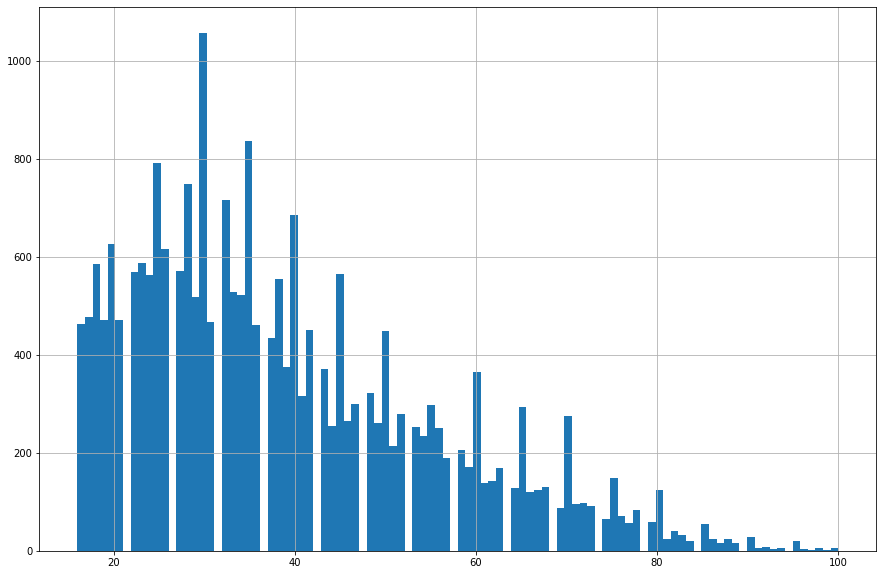

In [3]:
hist_age = df.age_of_respondent.hist(bins=100,figsize=[15,10])

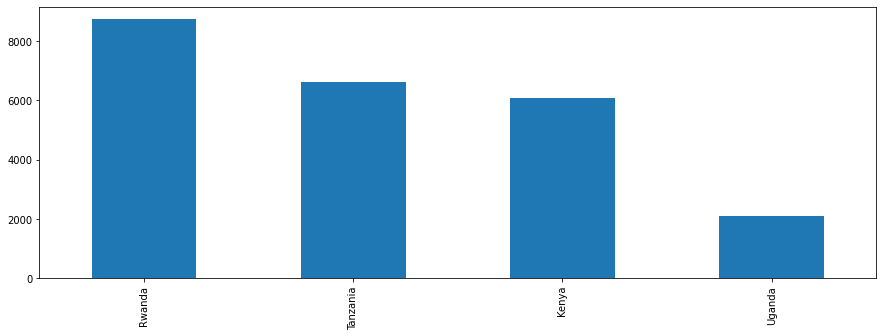

In [4]:
df['country'].value_counts().plot(kind='bar',figsize=[15,5])

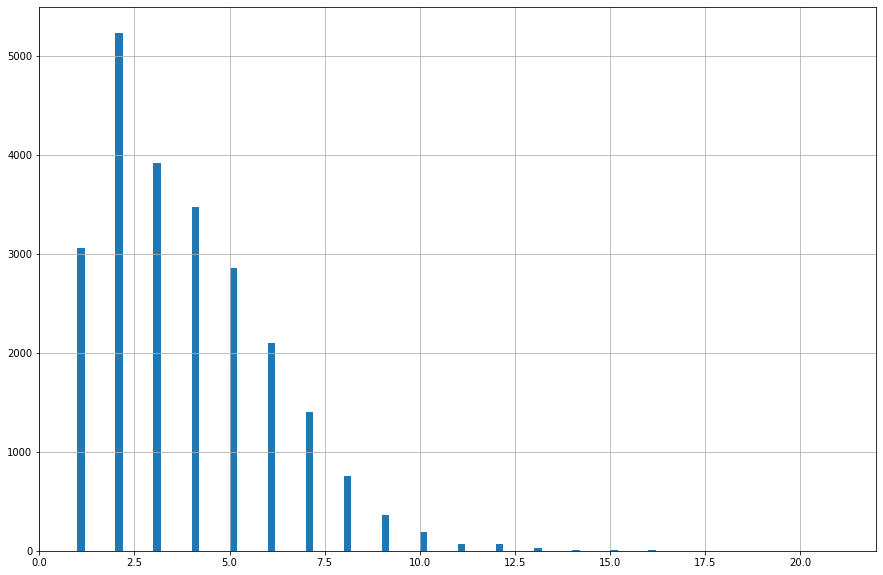

In [5]:
hist_household = df.household_size.hist(bins=100,figsize=[15,10])

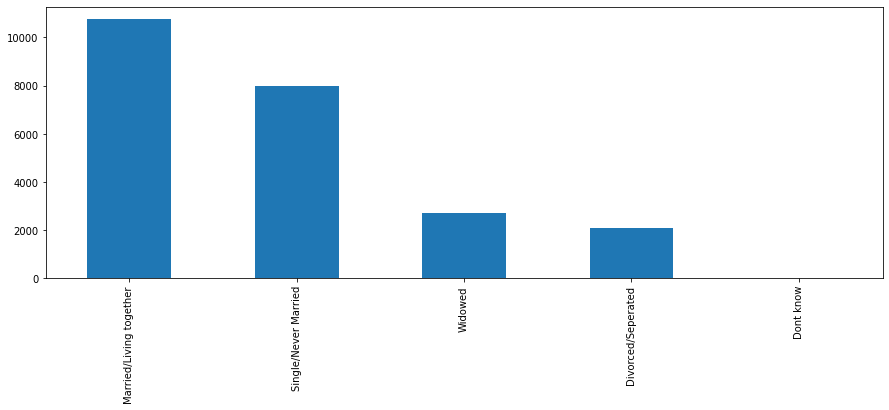

In [6]:
df['marital_status'].value_counts().plot(kind='bar',figsize=[15,5])

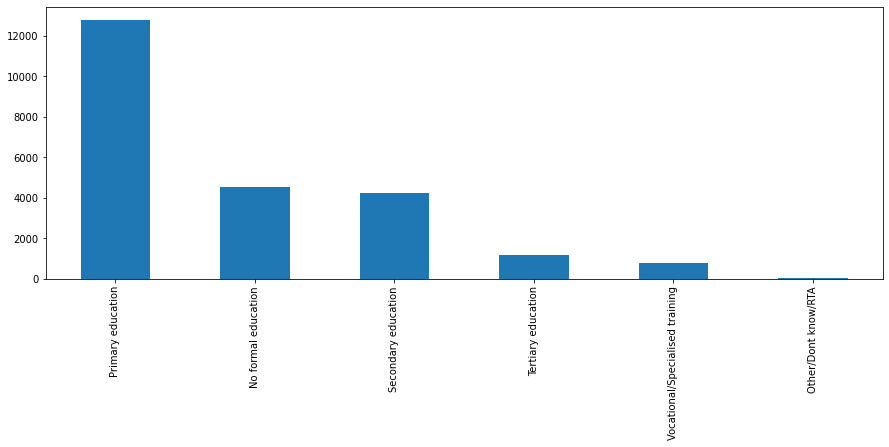

In [7]:
df['education_level'].value_counts().plot(kind='bar',figsize=[15,5])

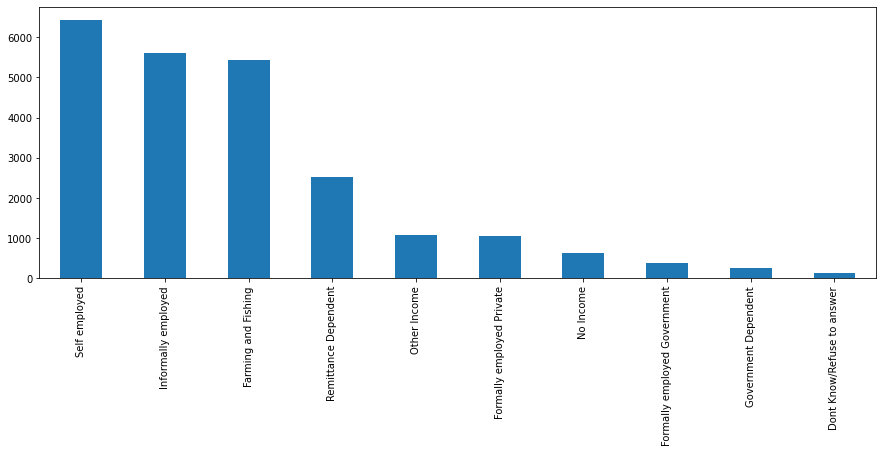

In [8]:
df['job_type'].value_counts().plot(kind='bar',figsize=[15,5])

In [9]:
rain = pd.read_csv("https://raw.githubusercontent.com/MhmdGaffar/MCF-Spring2022/main/RwandaDistrictRainfall.csv", index_col=0).transpose()
vegetation = pd.read_csv("https://raw.githubusercontent.com/MhmdGaffar/MCF-Spring2022/main/RwandaDistrictVegetation.csv", index_col=0).transpose()
import numpy as np
#Creating date features
years = list(np.arange(2000, 2015))
n_y = []
for year in years:
    new = [year]*12
    n_y += new
months = list(np.arange(1,13))*15
dates = []
for i in range(180):
    date = str(months[i]) + '/' + str(n_y[i])
    dates.append(date)
#Adding created date features to dataframe
rain['Date'] = dates
vegetation['Date'] = dates
#Coverting data features from str to datetime
rain['Date'] = pd.to_datetime(rain['Date'], format='%m/%Y')
vegetation['Date'] = pd.to_datetime(vegetation['Date'], format='%m/%Y')
vegetation = vegetation.fillna(vegetation.mean())
rain = rain.dropna()
districts = [a for a in rain.columns]
districts = districts[1:-1]
for d in districts:
  rain[d] = rain[d].astype(float)
  vegetation[d] = vegetation[d].astype(float)
rain = rain.set_index("Date")
vegetation = vegetation.set_index("Date")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [10]:
rain

Year,Month,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,...,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,JAN,52.9,52.9,52.2,52.9,51.1,52.9,52.9,52.9,52.9,...,58.3,53.4,52.9,58.8,56.1,57.6,54.5,52.9,53.9,52.9
2000-02-01,FEB,52.9,60.4,60.8,52.9,58.8,52.9,52.9,53.9,52.9,...,52.9,58.4,52.9,52.9,58.0,56.9,55.6,52.9,53.9,52.9
2000-03-01,MAR,100.0,113.3,107.1,100.0,104.6,100.0,100.0,101.0,100.0,...,115.5,114.2,103.5,118.2,115.0,101.2,101.1,100.0,101.0,105.6
2000-04-01,APR,103.9,103.1,106.1,105.9,107.7,100.0,105.9,105.9,104.7,...,99.9,105.9,100.0,101.6,105.9,98.8,101.1,100.0,99.0,97.4
2000-05-01,MAY,84.4,74.9,84.6,82.4,74.4,88.2,82.4,81.4,83.5,...,78.3,81.6,85.9,75.9,87.4,74.5,79.7,82.4,79.4,71.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,AUG,50.9,51.4,50.5,52.9,43.8,47.1,52.9,52.0,51.8,...,40.8,46.6,49.4,39.4,43.9,45.1,50.3,52.9,50.0,41.8
2014-09-01,SEP,72.6,74.9,69.4,70.6,59.7,76.5,70.6,68.6,71.8,...,55.3,64.2,64.7,60.3,61.5,52.9,60.4,64.7,60.8,53.5
2014-10-01,OCT,105.9,113.3,110.5,105.9,118.3,105.9,105.9,107.8,105.9,...,113.0,121.1,103.5,124.4,120.2,115.7,108.0,100.0,104.9,105.3


In [11]:
vegetation

,District,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,...,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,JAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,FEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,APR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,MAY,127.133558,134.274365,127.197642,130.407565,124.877629,129.622365,126.361863,128.071805,132.441846,...,135.714897,134.276864,137.636419,122.238514,125.553883,125.890110,113.814089,110.627623,129.789072,108.315401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,AUG,98.550873,94.160935,93.205589,101.119476,95.387990,106.481329,97.372000,108.978436,105.098921,...,99.904438,98.725144,101.352428,92.951380,97.566699,99.368323,86.172055,78.661577,90.483592,89.363809
2014-09-01,SEP,113.827449,113.132860,107.235529,112.501796,99.387072,118.110621,104.353607,117.117918,115.497784,...,117.810949,114.697183,116.135384,110.987026,119.403915,118.311787,105.022873,93.950087,112.585287,103.890327
2014-10-01,OCT,119.234089,116.222577,107.646784,116.710873,116.933985,114.168723,109.875596,111.469853,115.889171,...,121.214655,115.333571,119.826688,112.055063,121.534075,117.976353,102.266059,95.462463,109.214060,106.101497


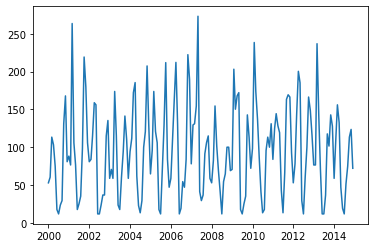

In [12]:
plt.plot(rain.index, rain['Gasabo'])
plt.show()

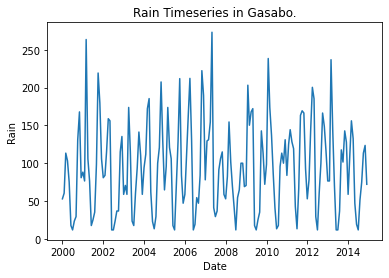

In [13]:
plt.plot(rain.index, rain['Gasabo'])
plt.xlabel('Date')
plt.ylabel('Rain')
plt.title('Rain Timeseries in Gasabo.')
plt.show()

In [14]:
#Averaging the columns together before getting monthly groups
rain_avg = rain.mean(axis=1)
veg_avg = vegetation.mean(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
rain_avg

Date
2000-01-01     53.993333
2000-02-01     54.816667
2000-03-01    105.773333
2000-04-01    102.820000
2000-05-01     81.696667
                 ...    
2014-08-01     47.743333
2014-09-01     66.023333
2014-10-01    110.296667
2014-11-01    118.373333
2014-12-01     66.710000
Length: 180, dtype: float64

In [16]:
veg_avg

Date
2000-01-01           NaN
2000-02-01           NaN
2000-03-01           NaN
2000-04-01           NaN
2000-05-01    129.379926
                 ...    
2014-08-01     99.146129
2014-09-01    112.813948
2014-10-01    114.019335
2014-11-01    127.181563
2014-12-01    126.782023
Length: 180, dtype: float64

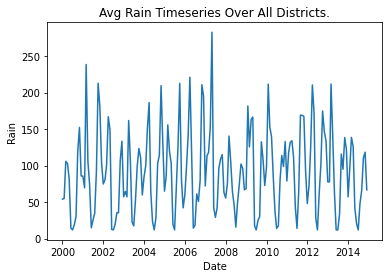

In [17]:
plt.plot(rain_avg.index, rain_avg)
plt.xlabel('Date')
plt.ylabel('Rain')
plt.title('Avg Rain Timeseries Over All Districts.')
plt.show()

In [18]:
#Getting monthly groups
monthly_rain = rain_avg.groupby(by=[rain_avg.index.month])
monthly_veg = veg_avg.groupby(by=[veg_avg.index.month])

In [19]:
for i in monthly_rain:
  print(i)

(1, Date
2000-01-01    53.993333
2001-01-01    85.536667
2002-01-01    74.730000
2003-01-01    57.150000
2004-01-01    84.456667
2005-01-01    64.963333
2006-01-01    60.340000
2007-01-01    72.086667
2008-01-01    55.443333
2009-01-01    68.163333
2010-01-01    97.666667
2011-01-01    78.883333
2012-01-01    47.976667
2013-01-01    77.653333
2014-01-01    57.206667
dtype: float64)
(2, Date
2000-02-01     54.816667
2001-02-01     69.426667
2002-02-01     80.496667
2003-02-01     64.516667
2004-02-01    100.556667
2005-02-01     85.803333
2006-02-01    100.786667
2007-02-01    113.506667
2008-02-01     75.146667
2009-02-01    181.623333
2010-02-01    211.570000
2011-02-01    117.650000
2012-02-01     72.170000
2013-02-01     77.653333
2014-02-01     97.873333
dtype: float64)
(3, Date
2000-03-01    105.773333
2001-03-01    238.500000
2002-03-01     99.850000
2003-03-01     57.150000
2004-03-01    150.353333
2005-03-01    155.693333
2006-03-01    142.453333
2007-03-01    117.926667
2008-0

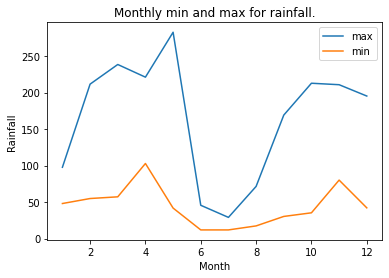

In [20]:
plt.plot(monthly_rain.max(), label = 'max')
plt.plot(monthly_rain.min(), label = 'min')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.title('Monthly min and max for rainfall.')
plt.legend()
plt.show()

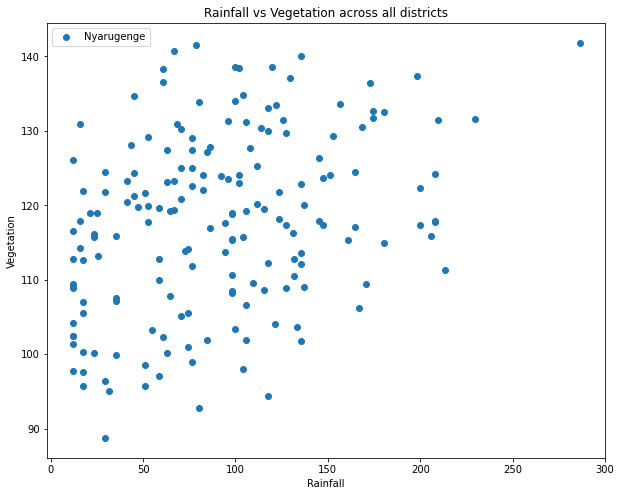

In [21]:
#Plotting rainfall against vegetation for all districts
plt.rcParams["figure.figsize"] = (10,8)
for dis in districts[0:1]:
    plt.scatter(rain[dis], vegetation[dis], label=dis)
    
plt.title("Rainfall vs Vegetation across all districts")
plt.xlabel("Rainfall")
plt.ylabel("Vegetation")
plt.legend()
plt.show()

Label Encoding and Classification

In [22]:
# First let's drop the outliers
ndf = df.loc[df.household_size < 11]

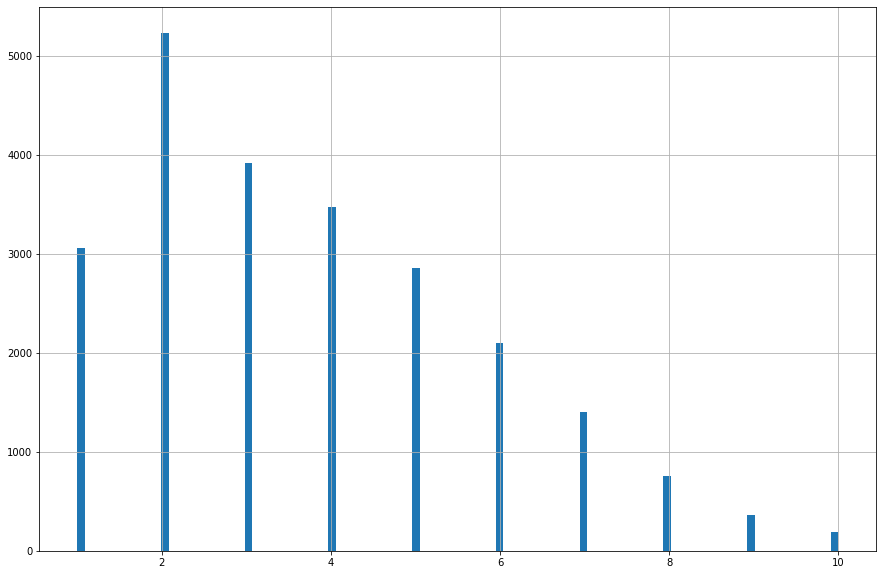

In [23]:
nhist_household = ndf.household_size.hist(bins=100,figsize=[15,10])

In [24]:
categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country']
# One Hot Encoding conversion
le = LabelEncoder()
edf = pd.get_dummies(ndf, prefix_sep='_', columns = categ)

# Labelncoder conversion
edf['location_type'] = le.fit_transform(ndf['location_type'])
edf['cellphone_access'] = le.fit_transform(ndf['cellphone_access'])
edf['gender_of_respondent'] = le.fit_transform(ndf['gender_of_respondent'])
edf['bank_account'] = le.fit_transform(ndf['bank_account'])

In [25]:
edf

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,1,0,1,3,24,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,0,0,0,5,70,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,1,1,1,5,26,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,0,0,1,5,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,0,1,0,8,26,1,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,0,1,4,48,0,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,2018,uniqueid_2114,0,0,1,2,27,0,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,2018,uniqueid_2115,0,0,1,5,27,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,uniqueid_2116,0,1,1,7,30,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
edf = edf.drop(['year', 'uniqueid'], axis=1)

In [27]:
edf.dtypes

bank_account                                       int64
location_type                                      int64
cellphone_access                                   int64
household_size                                     int64
age_of_respondent                                  int64
gender_of_respondent                               int64
relationship_with_head_Child                       uint8
relationship_with_head_Head of Household           uint8
relationship_with_head_Other non-relatives         uint8
relationship_with_head_Other relative              uint8
relationship_with_head_Parent                      uint8
relationship_with_head_Spouse                      uint8
marital_status_Divorced/Seperated                  uint8
marital_status_Dont know                           uint8
marital_status_Married/Living together             uint8
marital_status_Single/Never Married                uint8
marital_status_Widowed                             uint8
education_level_No formal educa

In [28]:
def plot_dataset(inputs, labels):
  # Plot the given 2D inputs and labels using Matplotlib.   
  plt.scatter(
      inputs[:, 0], inputs[:, 1], 
      c=['red' if label > 0 else 'blue' for label in labels])

  plt.axis('equal')

  plt.xlabel('x1')
  plt.ylabel('x2')

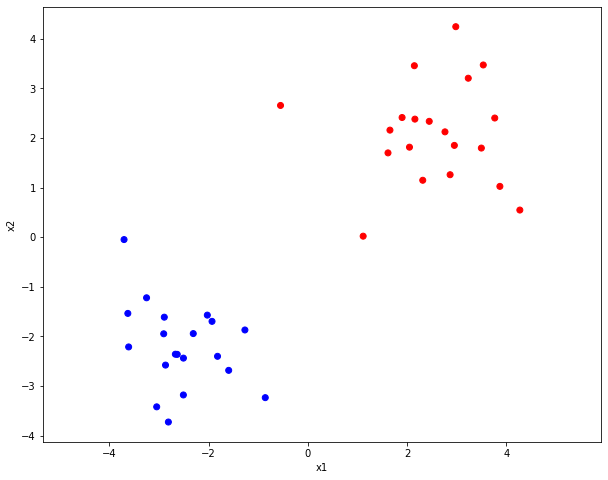

In [29]:
#@title Generate the Dataset  {run: "auto"}
# Define the centre(s) of the points
centre = 2    #@param {type:"slider", min:0, max:2, step:0.1}

points_in_class = 20  # How many points we want per class

# A fixed random seed is a common "trick" used in ML that allows us to recreate
# the same data when there is a random element involved. 
np.random.seed(0)  

# Generate random points in the "red" class
red_inputs = np.random.normal(loc=centre, scale=1.0, size=[points_in_class, 2])     
# Generate random points in the "blue" class
blue_inputs = np.random.normal(loc=-centre, scale=1.0, size=[points_in_class, 2])    
# Put these together
inputs = np.concatenate((red_inputs, blue_inputs), axis=0) 
    
# The class (label) is 1 for red or 0 for blue
red_labels = np.ones(points_in_class)    
blue_labels = np.zeros(points_in_class)
labels = np.concatenate((red_labels, blue_labels), axis=0)

# num_data_points is the total data set size
num_data_points = 2 * points_in_class

plot_dataset(inputs, labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


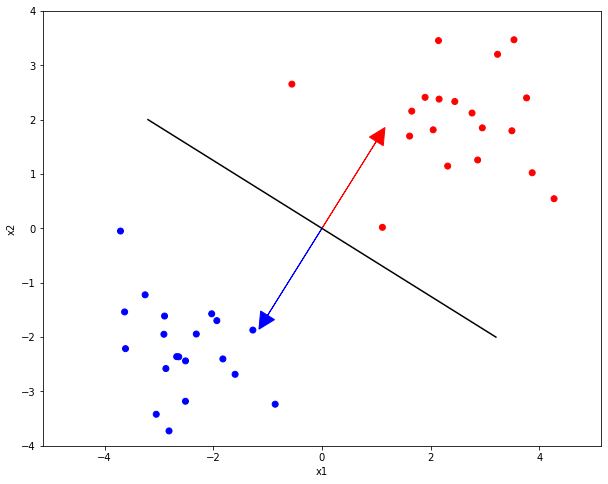

In [41]:
#@title Effect of parameters {run: "auto"}

# Define the parameters
w1 = 1 #@param {type:"slider", min:-5, max:5, step:1}
w2 = 1.6 #@param {type:"slider", min:-5, max:5, step:1.1}

plot_dataset(inputs, labels)

# Add the weight vector to the plot. We plot it in red, as it has to "point"
# in the direction of the red points.
ax = plt.axes()
ax.arrow(0, 0, w1, w2, head_width=0.3, head_length=0.3, fc='r', ec='r')
ax.arrow(0, 0, -w1, -w2, head_width=0.3, head_length=0.3, fc='b', ec='b')
# Plot part of the decision boundary in black. It is orthogonal to the weight
# vector.
t = 2
plt.plot([-t * w2, t * w2], [t * w1, -t * w1], 'k-')

plt.xlim([-4, 4])
plt.ylim([-4, 4])

plt.show()

LogisticRegression()

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
cls = LogisticRegression()
cls.fit(inputs,labels)

LogisticRegression()

In [33]:
cls.coef_

array([[1.07898863, 1.00449204]])

In [34]:
# Split into training and test sets
X = edf.drop(["bank_account"], axis = 1)
Y = edf["bank_account"]
X_train, X_test, y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=47)

In [35]:
cls.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

LogisticRegression()

In [42]:
cls.coef_.shape

(1, 36)

In [43]:
preds = cls.predict(X_test)

In [44]:
mat = metrics.confusion_matrix(y_test, preds) 
print(mat)

[[5809  170]
 [ 678  343]]


In [45]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds).ravel()
print(tn, fp, fn, tp)

5809 170 678 343


In [46]:
metrics.accuracy_score(y_test, preds)

0.8788571428571429